In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from matplotlib import font_manager,rc, rcParams
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

rcParams['axes.unicode_minus'] = False

%matplotlib inline

# 구간 분할, 이산화 / 선형 모델, 트리 모델

선형 모델과 트리 기반 모델은 특성의 표현 방식으로 인해 미치는 영향이 다르다. 입력 특성이 하나인 wave 데이터셋을 사용해 살펴볼 것

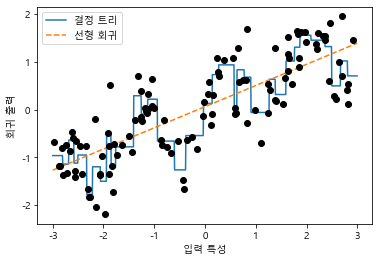

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,reg.predict(line),label='결정 트리')

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--',label='선형 회귀')

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

선형 모델은 특성이 하나일 때는 직선으로 나타난다. 결정 트리는 훨씬 복잡한 모델이 만들어지는데 데이터의 표현 형태에 따라 굉장히 달라진다. 연속형 데이터에 아주 강력한 선형 모델을 만들 수 있는 방법 하나는 한 특성을 여러 특성으로 나누는 '구간 분할(bining)'이다.

위 특성의 입력값 범위가 나뉘어 여러 구간으로 되어있다면 각 데이터 포인트가 어떤 구간에 속하는지로 나타낼 수 있다. <br>
구간의 경계를 정의하는 데에는 균일한 너비로 하거나 데이터의 분위를 사용하는 등의 방법이 있다.<br>
KBinDiscretizer클래스에 이런 방법들이 구현되어 있다.

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10,strategy='uniform')

kb.fit(X)
print(kb.bin_edges_)

[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [5]:
# transform을 사용하면 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있다.

X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [6]:
print(X[:10])

# 어느 구간에 속하는지
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [7]:
# encode를 onehot-dense로 지정하면 scipy 행렬을 거치지 않고 바로 원핫인코딩 행렬을 얻을 수 있음
kb = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [8]:
X_binned[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Text(0.5, 0, '입력 특성')

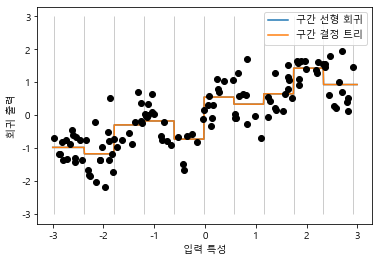

In [9]:
line_binned = kb.transform(line)
reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='구간 결정 트리')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

선형 회귀와 결정 트리가 같은 예측을 만들어내면서 두 선이 겹친다. 구간으로 나눈 특성을 사용하기 전과 비교하면 각 구간에서 다른 값을 가지고 있던 선형 모델이 훨씬 유연해진 것을 알 수 있다. 반면 트리 모델은 덜 유연해졌는데 트리 모델은 데이터를 자유롭게 나눠 학습할 수 있으므로 특성 값을 나누는 것이 득이 되지 않는다.

일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형모델을 사용해야한다면 구간 분할이 모델 성능을 높이는데 아주 좋은 방법이 될 수 있다.

# 상호작용과 다항식
특성을 풍부하게 나타내는 방법의 다른 방법은 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 것<br>
이러한 방법은 통계적 모델링에서 자주 사용하지만 일반적인 머신러닝 어플리케이션에도 많이 적용한다.

앞의 예에서 wave 데이터셋의 각 구간에 대해 상숫값을 학습했다. 그런데 선형 모델은 이런 절편 이외에 기울기 역시 학습할 수 있다.<br>
선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성(지금 경우는 x축)을 다시 추가하는 것이다. 이렇게 하면 11차원 데이터셋이 만들어진다.

In [10]:
X_binned.shape

(120, 10)

In [11]:
X.shape

(120, 1)

In [12]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


In [13]:
line.shape

(1000, 1)

In [14]:
line_binned

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

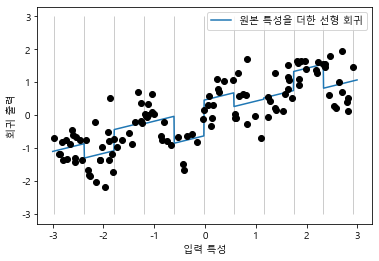

In [15]:
reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:,0],y,'o',c='k')

In [16]:
line_combined[103:107]

array([[-2.382,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [-2.376,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [-2.37 ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [-2.364,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ]])

In [17]:
line[103:107]

array([[-2.382],
       [-2.376],
       [-2.37 ],
       [-2.364]])

이 예에서 모델은 각 구간의 절편과 기울기를 학습했다. 학습된 기울기는 양수이고 모든 구간에 걸쳐 동일하다.

기울기가 모든 구간에서 같으니 별로 유익해보이지 않는데 각 구간에서 다른 기울기를 가지게 할 수 있다.<br>
이런 효과를 위해 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있다. 이 특성은 구간 특성과 원본 특성의 곱이다.

In [18]:
# 이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0이다.

(X*X_binned)[:5]

array([[-0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.39196365,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.59195091,  0.        ,  0.        ,  0.        ],
       [-0.        , -2.06388816, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

In [19]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [20]:
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(120, 20)


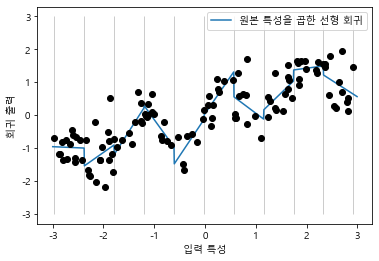

In [21]:
reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1,alpha=.2)
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

이 모델에서는 각 구간에서 절편과 기울기가 모두 다르다.

구간 나누기는 연속형 특성을 확장하는 방법 중 하나이다. 원본 특성의 다항식을 추가하는 방법도 있는데 특성 x가 주어지면 $x^2,x^3$ 등을 시도해보는 것이다.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# x의 10승까지의 고차항을 추가
# 기본값인 include_bias=True는 절편에 해당하는 1(=x^0)인 특성을 추가한다.
poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print(X_poly.shape)

(120, 10)


In [23]:
print(X[:3],'\n')
print(X_poly[:3],'\n')

# 특성 x가 x0라는 이름으로 들어가있음
print('항의 이름 : ',poly.get_feature_names())

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]] 

[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]] 

항의 이름 :  ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


X_poly의 첫 번째 열은 X와 같고 다른 열들은 거듭제곱, 그렇기 때문에 어떤 값들은 매우 크게 나오는 것을 확인할 수 있다.

다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀(polynomial regression) 모델이 된다.

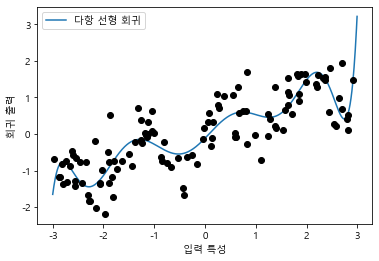

In [24]:
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='다항 선형 회귀')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만든다. 그러나 고차원 다항식은 데이터가 부족한 영역, 그래프의 시작점과 끝점에서는 급격하게 내려가거나 상승하는 등 너무 민감하게 동작한다. 

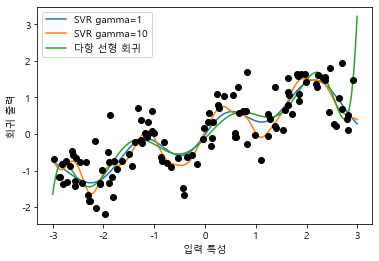

In [25]:
# 비교

from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label='SVR gamma={}'.format(gamma))

plt.plot(line,reg.predict(line_poly),label='다항 선형 회귀')    
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

### 상호작용과 다항식을 위해 더 현실적인 보스턴 주택 가격 데이터셋을 이용

In [26]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(X_train.shape)
print(X_train_poly.shape)

# 항의 개수는 13개의 특성 중 조합(combination) + 원본 특성(13개) + 절편(1개)임
# degree=3으로 할 경우 절편 + 원본 특성 + 두 개 조합 + 세 개 조합의 개수이다.
print("항의 이름 : \n",poly.get_feature_names())

(379, 13)
(379, 105)
항의 이름 : 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


상호작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능을 비교

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(ridge.score(X_test_scaled,y_test)))
ridge = Ridge().fit(X_train_poly,y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(ridge.score(X_test_poly,y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


상호작용과 다항식 특성이 Ridge의 성능을 크게 높였다. 그러나 랜덤포레스트와 같이 더 복잡한 모델을 사용하면 좀 달라진다.

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_scaled,y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(rf.score(X_test_scaled,y_test)))
rf = RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train_poly,y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(rf.score(X_test_poly,y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹으며 오히려 상호작용과 다항식을 추가하면 성능이 줄어든다.

# 일변량 비선형 변환
앞서 봤듯 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 된다. 한편 log,exp,sin 같은 함수를 적용하는 방법 역시 특성 변환에 쓰일 수 있다.

트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있다. 그리고 특성과 타깃값 사이에 비선형이 있다면 특히 선형 회귀에서는 모델을 만들기가 어려운데 log,exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는데 도움을 준다. sin과 cos 함수는 주기적인 패턴이 들어있는 데이터를 다룰 때 편리하다.

대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 내는데 log와 exp 같은 함수를 사용하면 이런 모양을 쉽고 효과적으로 만들 수 있다. 이런 변환이 도움이 되는 전형적인 경우는 정수 카운트 데이터를 다룰 때이다. 카운트 데이터라면 '사용자가 얼마나 자주 로그인하는가?' 같은 특성인데 음수가 없으며 특별한 통계 패턴을 따르는 경우가 많다.

In [29]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

# poisson 함수의 내부는 lambda 값을 입력한 것
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org,w)
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


In [30]:
X.shape

(1000, 3)

In [31]:
y.shape

(1000,)

첫 번째 특성 맨 앞 10개를 살펴보면 모두 양의 정수이지만 특정 패턴을 보이지는 않는다. 하지만 각 값이 나타난 횟수를 세면 분포가 잘 드러난다.

In [32]:
# 2가 68번으로 가장 많이 나타나며 큰 값의 수는 빠르게 줄어든다. 
np.bincount(X[:,0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

Text(0.5, 0, '값')

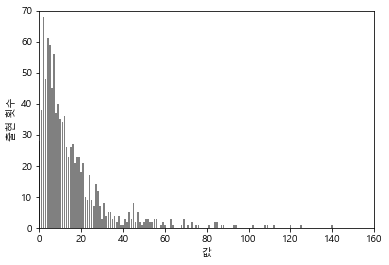

In [33]:
# X[:,1],X[:,2] 특성도 비슷
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

작은 수치가 많고 큰 수치는 몇 안되는 종류의 분포는 실제로 자주 나타나지만(ex)푸아송 분포) 선형 모델은 이런 데이터를 잘 처리하지 못한다.

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print(score)

0.6224186236310758


이처럼 Ridge가 X와 y의 관계를 제대로 모델링 하지 못했으나 로그 스케일로 변환하면 도움이 된다. 데이터에 0이 있으면 log함수를 사용할 수 없으므로 log(X+1)을 사용한다.

Text(0.5, 0, '값')

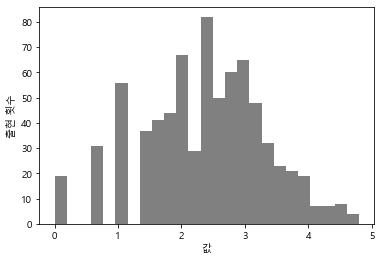

In [35]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)
plt.hist(X_train_log[:,0],bins=25,color='gray')
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [36]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print(score)

0.8749342372887815


이 예에서는 모든 특성이 같은 속성을 가지고 있으나 실제로 이런 경우는 드물며, 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 한다. 이런 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수적이다. SVM, KNN, 신경망 같은 모델은 이따금 구간 분할, 상호작용, 다항식으로 이득을 볼 수도 있으나 선형 모델보다는 영향이 그리 뚜렷하지는 않다.

간혹 회귀에서는 타깃 변수 y를 변환하는게 좋은 경우도 있다.